# Predicting Heart Disease

### Background:

Heart disease is one of the leading causes of death globally. Early detection and accurate diagnosis are crucial for effective treatment and prevention of heart-related complications. Various factors such as age, gender, chest pain type, blood pressure, cholesterol level, and other clinical parameters are known to influence the risk of heart disease.

### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement

The objective of this project is to develop a predictive model that can accurately identify the presence or absence of heart disease based on clinical and demographic features.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os


os.getcwd()

'/Users/mac/Desktop/Workspace/end_to_end/notebook/data'

In [3]:
df = pd.read_csv('../data/heart.csv')

In [4]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.shape

(303, 14)

In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [7]:
df.duplicated().sum()

1

In [8]:
df.drop_duplicates(inplace =True)

df.duplicated().sum()

0

In [9]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [10]:
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [11]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
# Assuming df is the DataFrame
output_counts = df['output'].value_counts()

print("Number of 0's (absence of heart disease):", output_counts[0])
print("Number of 1's (presence of heart disease):", output_counts[1])


Number of 0's (absence of heart disease): 138
Number of 1's (presence of heart disease): 164


## 2. Exploring Data ( Visualization )

### Univariate Analysis

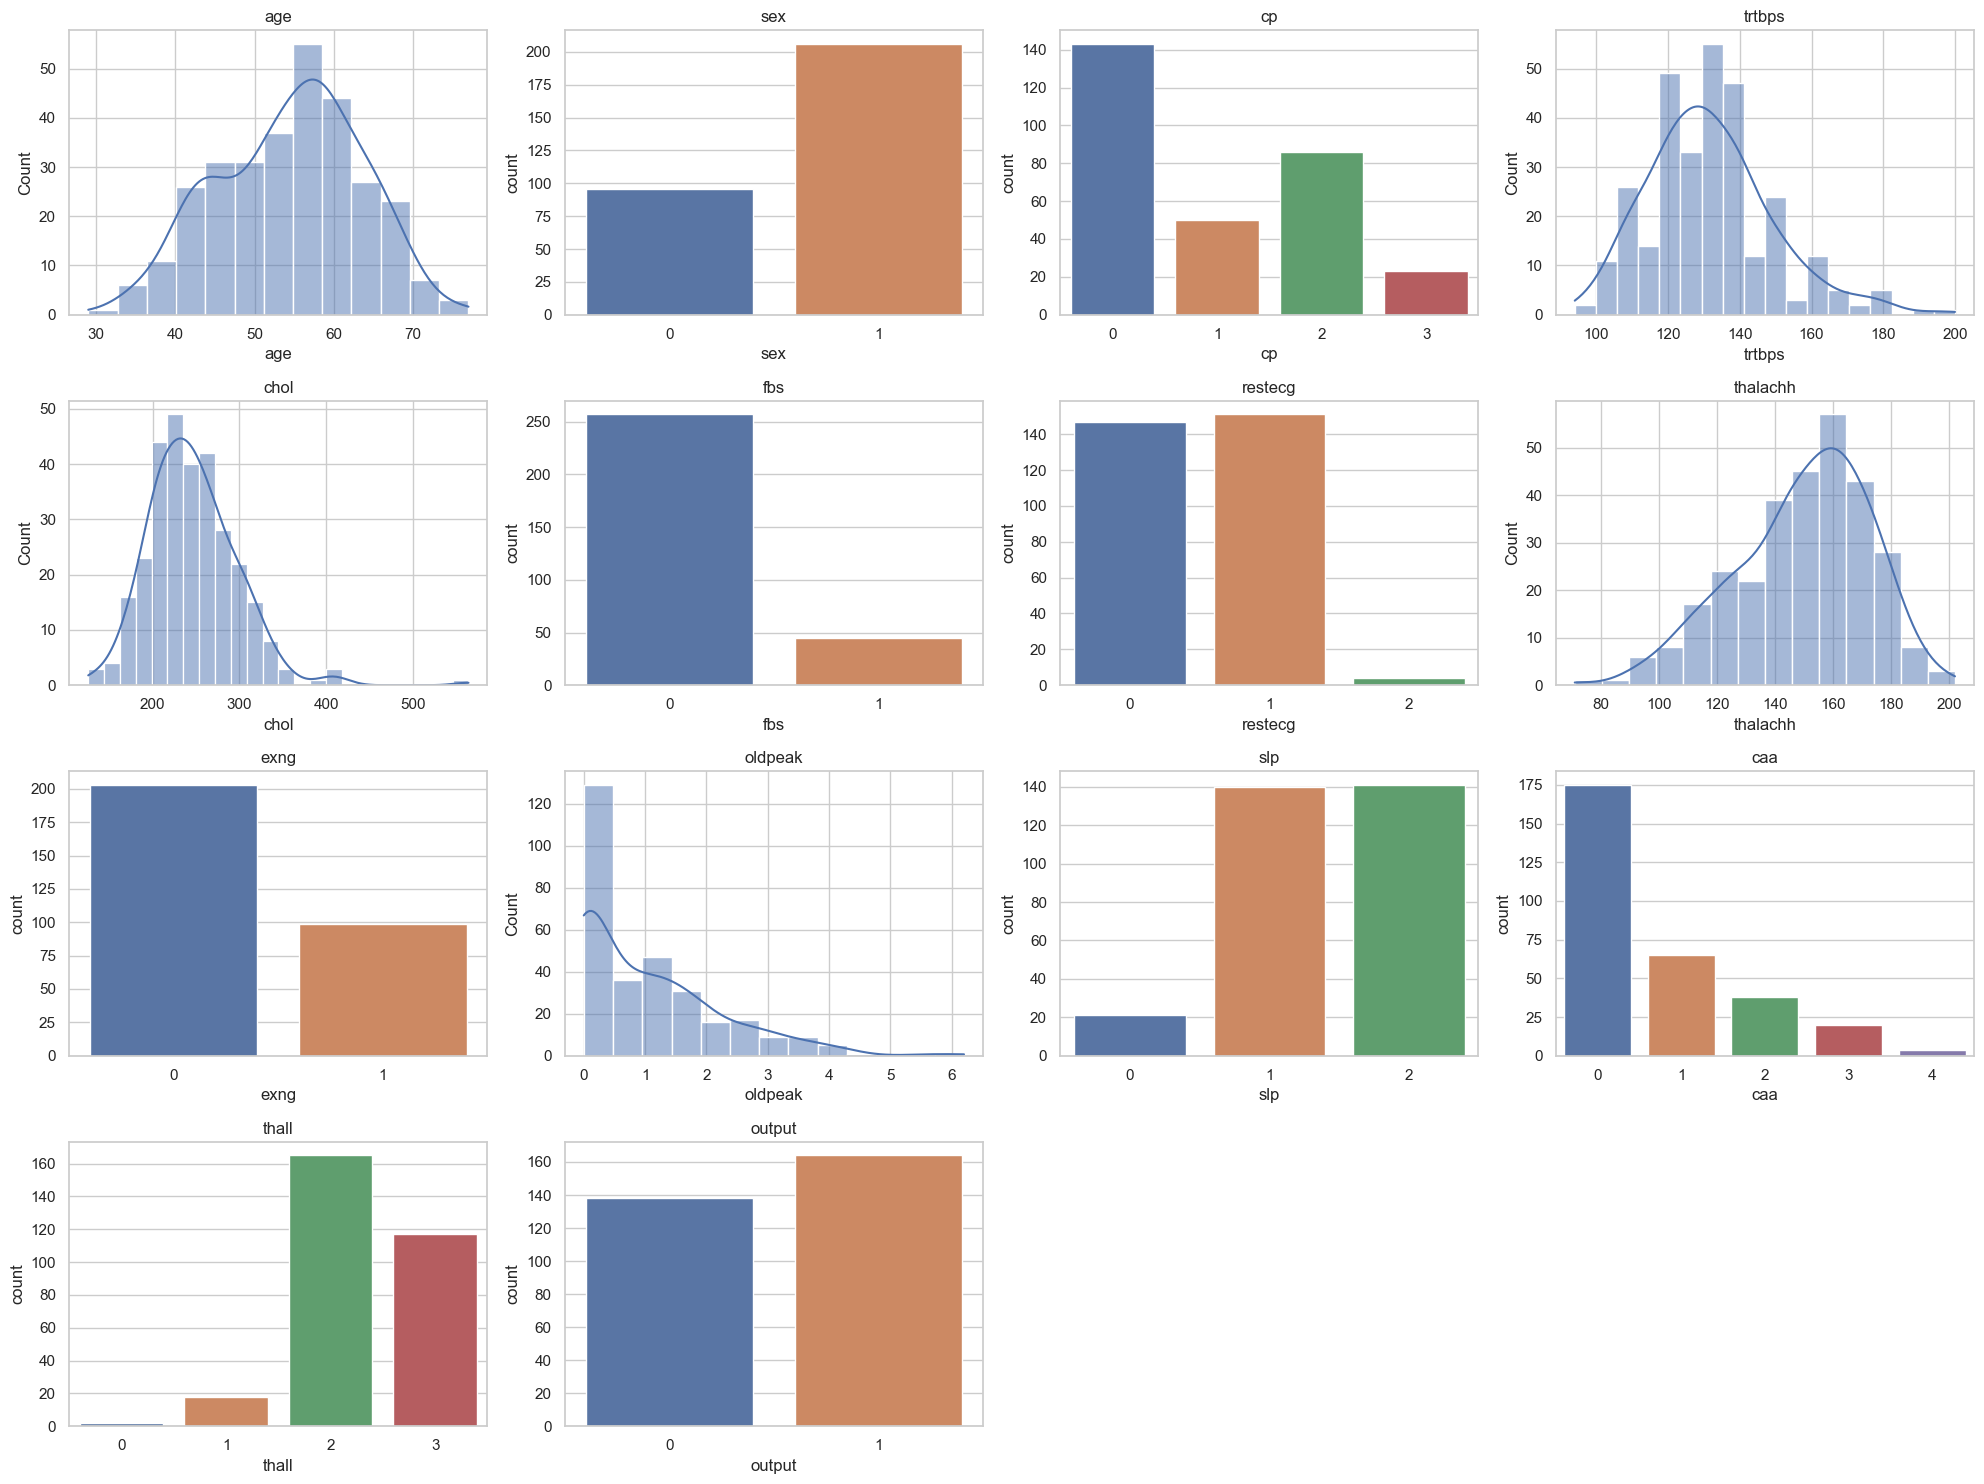

In [13]:
# Set the style for seaborn
sns.set(style="whitegrid")


plt.figure(figsize=(20, 15))
for i, col in enumerate(df.columns):
    plt.subplot(4, 4, i+1)
    if df[col].dtype == 'float64' or df[col].nunique() > 10:
        sns.histplot(df[col], kde=True)
    else:
        sns.countplot(data=df, x=col)
    plt.title(col)
plt.tight_layout()
plt.show()

### Bivariate Analysis

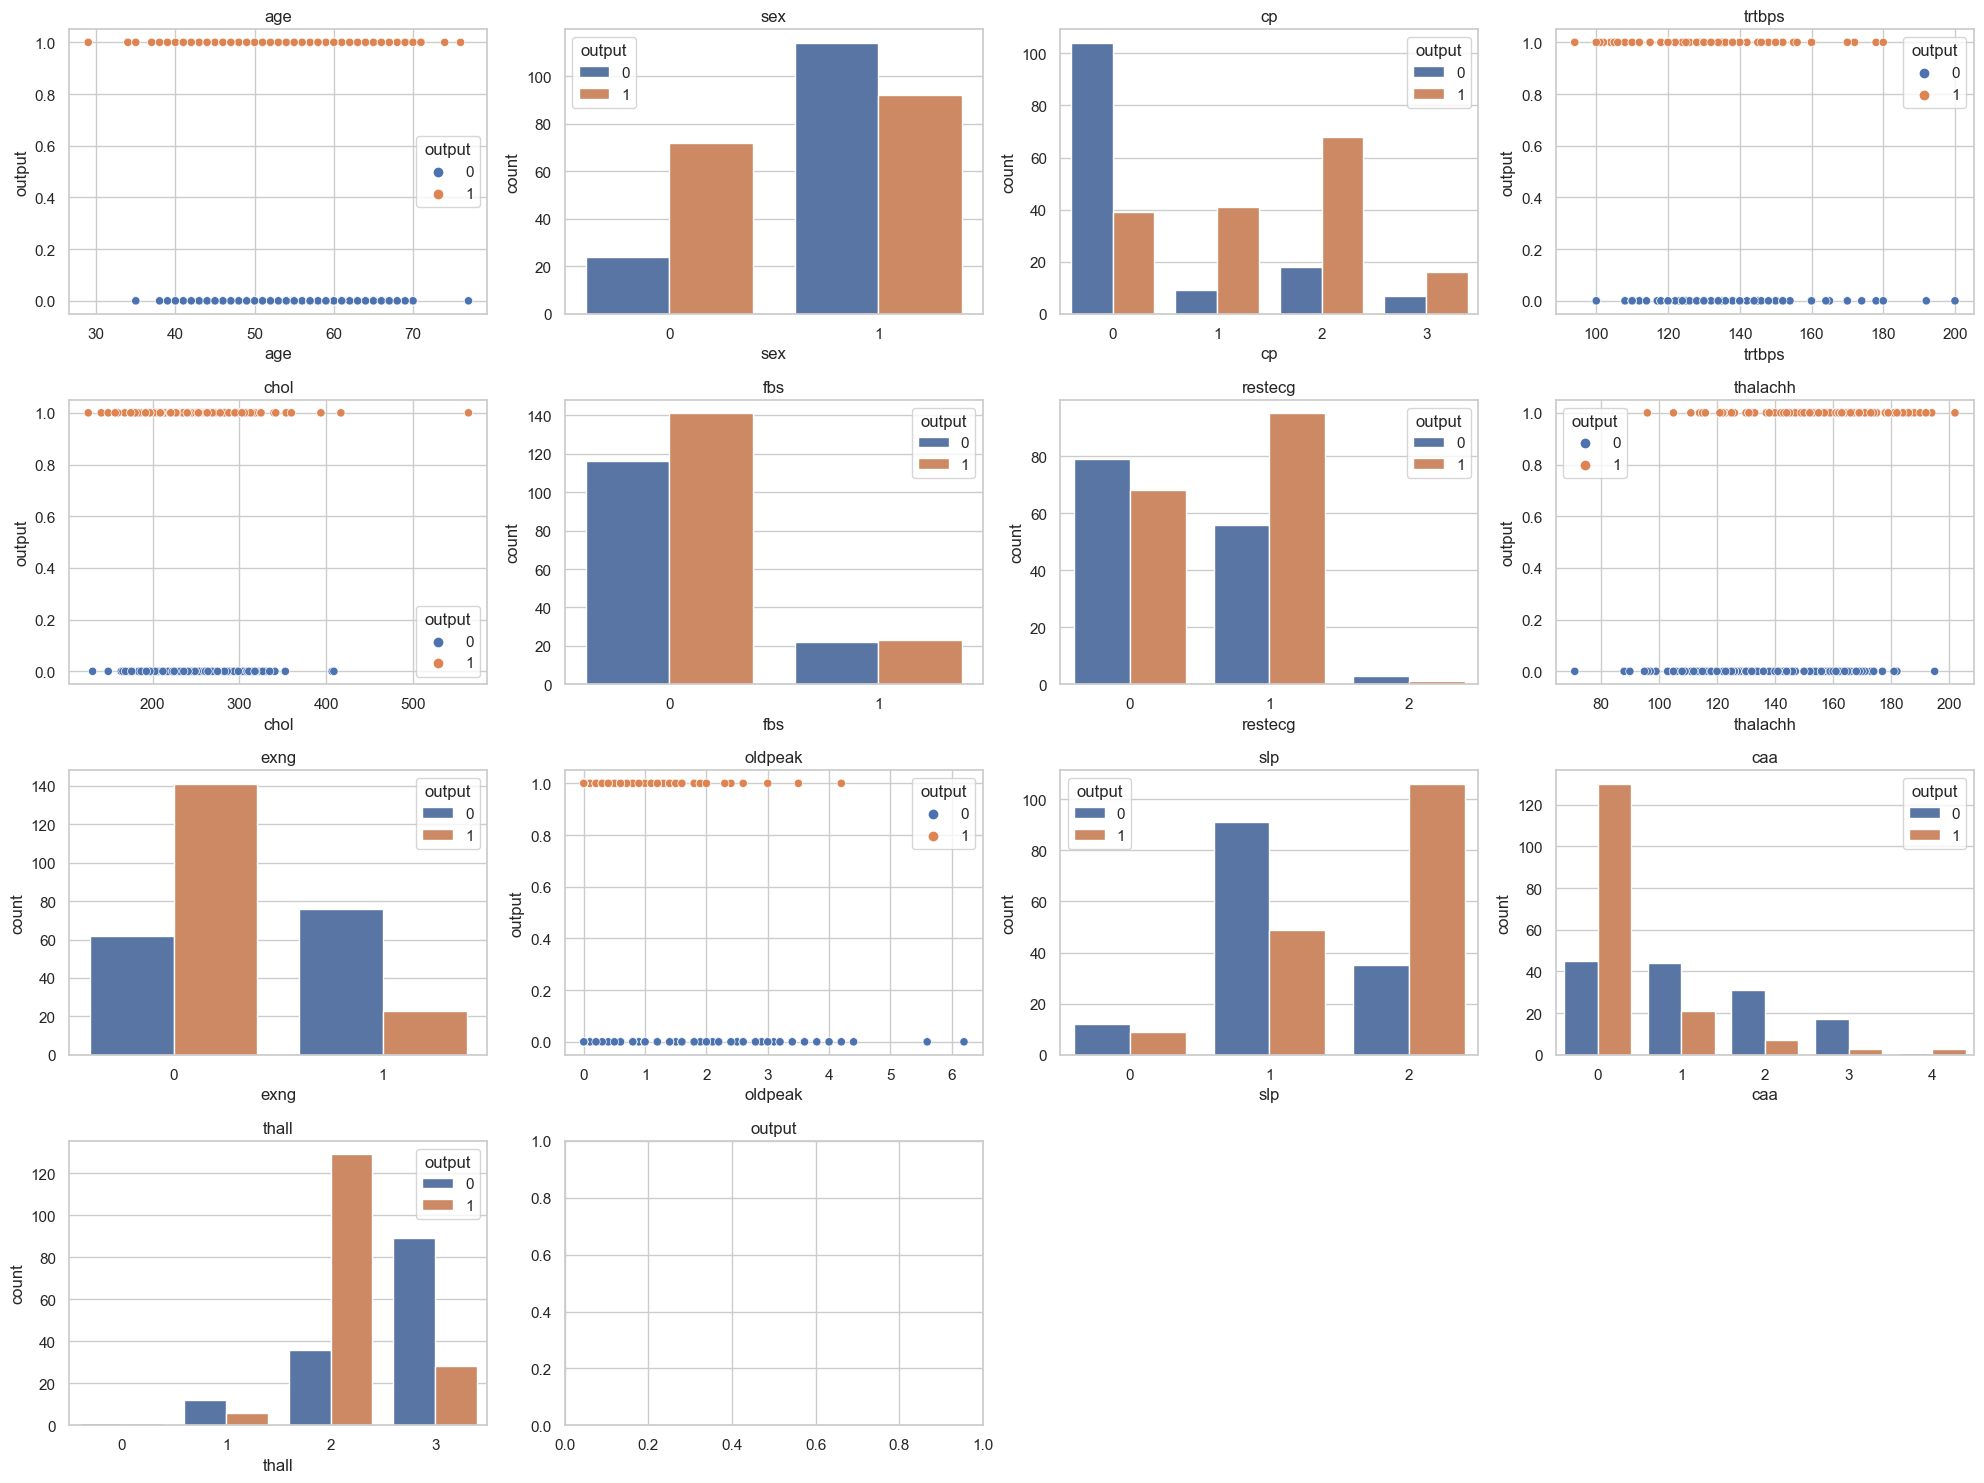

In [14]:

plt.figure(figsize=(20, 15))
for i, col in enumerate(df.columns):
    plt.subplot(4, 4, i+1)
    if col != 'output':
        if df[col].dtype == 'float64' or df[col].nunique() > 10:
            sns.scatterplot(data=df, x=col, y='output', hue='output')
        else:
            sns.countplot(data=df, x=col, hue='output')
    plt.title(col)
plt.tight_layout()
plt.show()

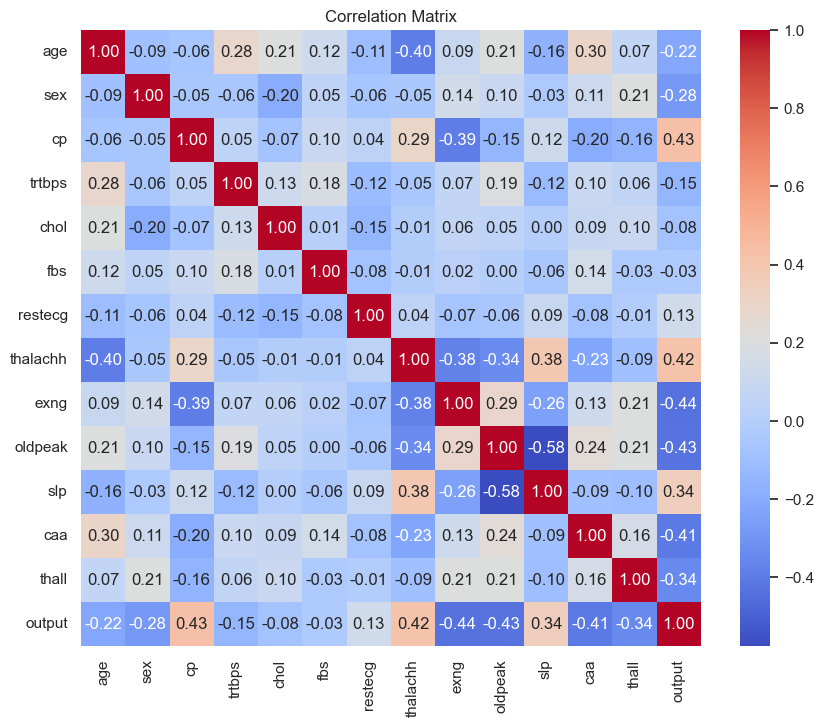

In [15]:
# Multivariate Analysis
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### CHECKING OUTLIERS

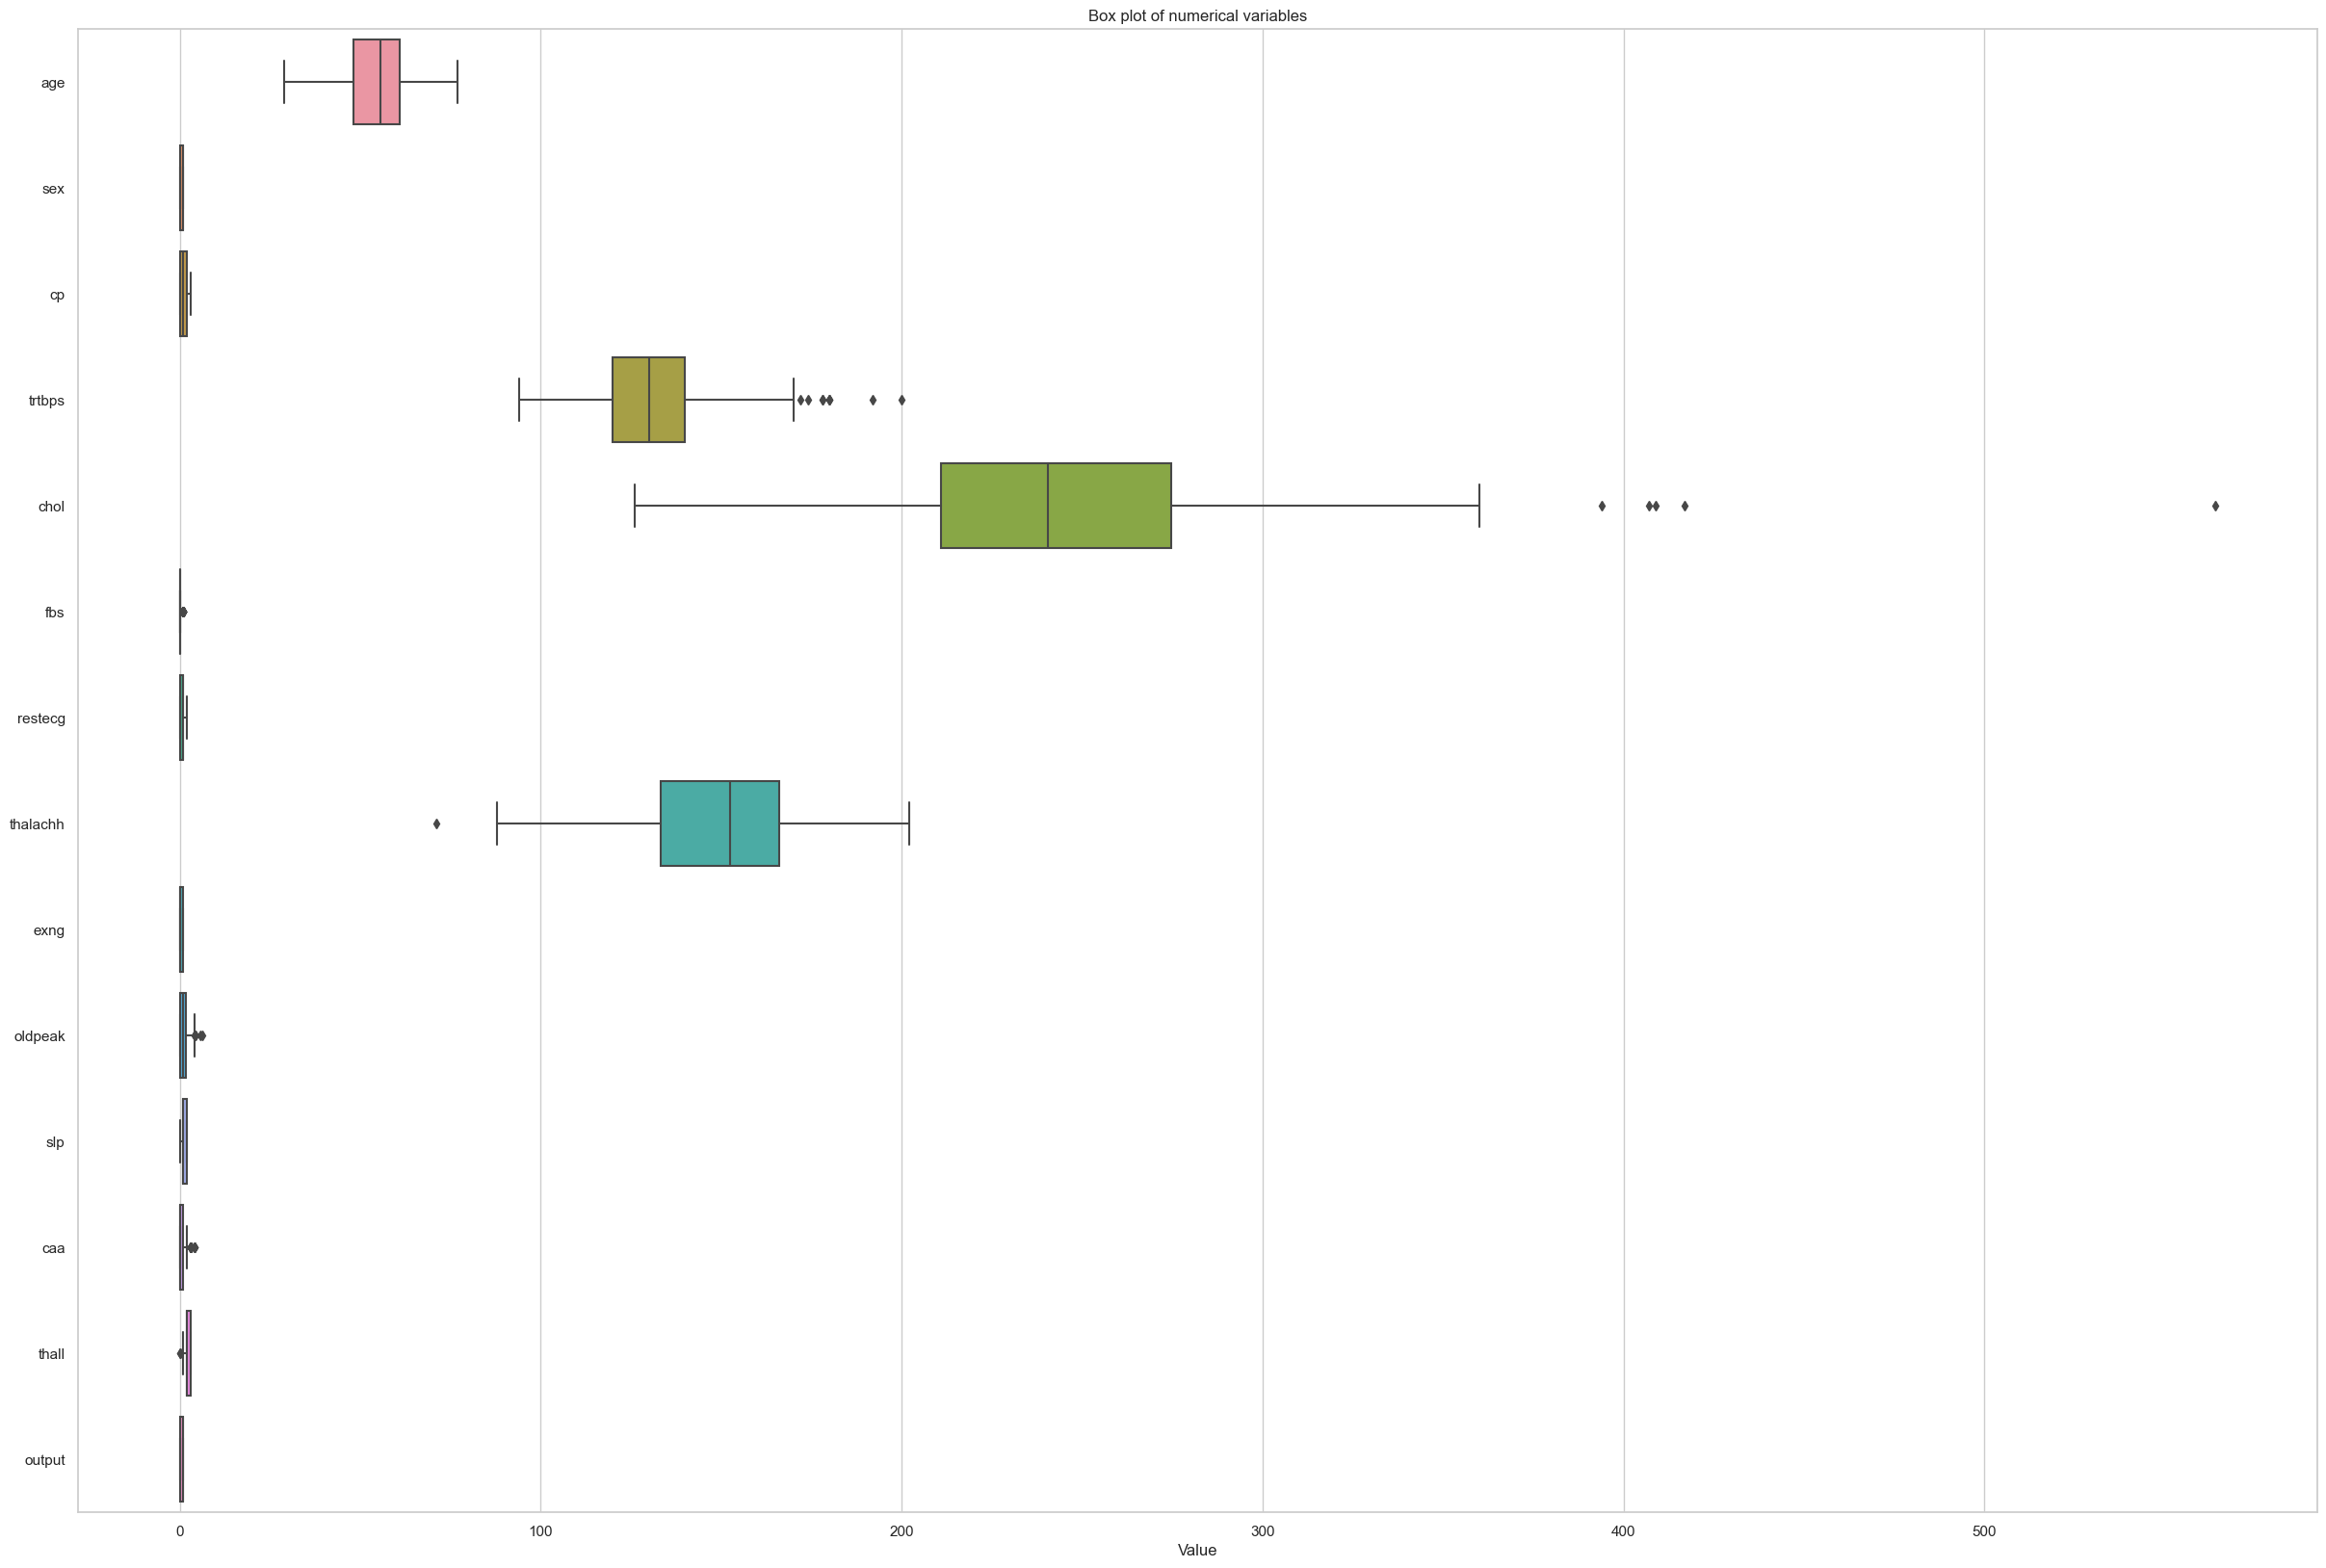

In [16]:

# Set the style for seaborn
sns.set(style="whitegrid")

# Create box plots for numerical variables
plt.figure(figsize=(30, 20))
sns.boxplot(data=df, orient="h")
plt.title('Box plot of numerical variables')
plt.xlabel('Value')
plt.show()


In [17]:
# Calculate IQR for each numerical variable
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Identify potential outliers
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
outliers_df = df[outliers]

print("Potential outliers:")
outliers_df


Potential outliers:


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1
23,61,1,2,150,243,1,1,137,1,1.0,1,0,2,1
26,59,1,2,150,212,1,1,157,0,1.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,59,1,2,126,218,1,1,134,0,2.2,1,1,1,0
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0


In [20]:
def outlier_lims(col):
    q3,q1= np.percentile(col, [75,25])
    iqr= q3-q1
    upper_lim= q3 + 1.5* iqr
    lower_lim= q1 - 1.5* iqr
    return upper_lim, lower_lim

for col in df:
    print ("--------------------------------------------------------------------")
    print ("Column:", col)

    UL, LL = outlier_lims(df[col])
    print ("Upper Limit", UL)
    print ("Lower Limit", LL)

    total_outliers = len(df.loc[df[col] < LL,col]) + len(df.loc[df[col]> UL, col])
    percent = (total_outliers/len(df.index)) *100
    print("Percentage of Outliers=", percent)
    print ("--------------------------------------------------------------------")


--------------------------------------------------------------------
Column: age
Upper Limit 80.5
Lower Limit 28.5
Percentage of Outliers= 0.0
--------------------------------------------------------------------
--------------------------------------------------------------------
Column: sex
Upper Limit 2.5
Lower Limit -1.5
Percentage of Outliers= 0.0
--------------------------------------------------------------------
--------------------------------------------------------------------
Column: cp
Upper Limit 5.0
Lower Limit -3.0
Percentage of Outliers= 0.0
--------------------------------------------------------------------
--------------------------------------------------------------------
Column: trtbps
Upper Limit 170.0
Lower Limit 90.0
Percentage of Outliers= 2.980132450331126
--------------------------------------------------------------------
--------------------------------------------------------------------
Column: chol
Upper Limit 370.375
Lower Limit 115.375
Percentage of O

## DEFINITION OF TERMS

- age: Age of the individual (integer).
- sex: Gender of the individual (integer). Typically, 0 represents female and 1 represents male.
- cp: Chest pain type (integer). It could be categorized into different types such as 0 for typical angina, 1 for atypical angina, 2 for non-anginal pain, and 3 for asymptomatic.
- trtbps: Resting blood pressure (in mm Hg) (integer).
- chol: Serum cholesterol level in mg/dl (integer).
- fbs: Fasting blood sugar > 120 mg/dl (integer). Typically, 0 represents false and 1 represents true.
- restecg: Resting electrocardiographic results (integer). It could represent different values based on different ECG results.
- thalachh: Maximum heart rate achieved (integer).
- exng: Exercise-induced angina (integer). Typically, 0 represents no and 1 represents yes.
- oldpeak: ST depression induced by exercise relative to rest (float).
- slp: Slope of the peak exercise ST segment (integer).
- caa: Number of major vessels colored by fluoroscopy (integer).
- thall: Thallium stress test result (integer).
- output: Target variable indicating presence of heart disease (integer). Typically, 0 represents absence and 1 represents presence.
